## Logistic Regression Implementation

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [3]:
## create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [6]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.90      0.92      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[146  14]
 [ 11 129]]


## Hyperparameter Tuning And Cross Validation

## Grid SearchCV

In [8]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [9]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [10]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [11]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [12]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [17]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [18]:
grid.best_score_

0.9242857142857142

In [19]:
y_pred=grid.predict(X_test)

In [20]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.92
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       165
           1       0.89      0.94      0.91       135

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149  16]
 [  8 127]]


## Randomized SearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [23]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [24]:
randomcv.best_score_

0.9228571428571428

In [25]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

In [26]:
y_pred=randomcv.predict(X_test)

In [27]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       165
           1       0.90      0.95      0.92       135

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[150  15]
 [  7 128]]


## Logistic Regression For Multiclass Classification Problem

In [28]:
## create the dataset
X, y = make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=15)

In [30]:
# y

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

In [33]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [34]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[84  3 10]
 [10 74  7]
 [ 8 25 79]]


## Logistic Regression for Imbalanced Dataset

In [35]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification


In [36]:
## imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,weights=[0.99],random_state=10)

In [37]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [38]:
Counter(y)

Counter({0: 9846, 1: 154})

In [39]:
import seaborn as sns

In [41]:
import pandas as pd
sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [42]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [44]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [45]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [46]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [47]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [50]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [51]:
y_pred=grid.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

[[2468   18]
 [   2   12]]


## Logistic Regression With ROC curve And ROC AUC score 

In [54]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [55]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [56]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [57]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [58]:
## Lets Create Basic Logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
## Prediction based on probability
model_prob=model.predict_proba(X_test)

In [60]:
model_prob

array([[8.16436799e-02, 9.18356320e-01],
       [1.13414988e-01, 8.86585012e-01],
       [9.76883710e-01, 2.31162898e-02],
       [1.80738214e-02, 9.81926179e-01],
       [4.54450137e-02, 9.54554986e-01],
       [2.03350453e-01, 7.96649547e-01],
       [9.93176674e-01, 6.82332634e-03],
       [9.46020030e-01, 5.39799703e-02],
       [8.67860698e-03, 9.91321393e-01],
       [5.91440489e-01, 4.08559511e-01],
       [9.85089605e-01, 1.49103945e-02],
       [8.28734151e-02, 9.17126585e-01],
       [1.37721510e-01, 8.62278490e-01],
       [5.20992093e-03, 9.94790079e-01],
       [9.60107910e-01, 3.98920904e-02],
       [9.50680690e-01, 4.93193096e-02],
       [2.10462990e-02, 9.78953701e-01],
       [8.30142923e-01, 1.69857077e-01],
       [9.62867394e-01, 3.71326061e-02],
       [3.21821832e-02, 9.67817817e-01],
       [9.96087811e-01, 3.91218916e-03],
       [1.14079029e-01, 8.85920971e-01],
       [1.80197487e-01, 8.19802513e-01],
       [4.30554119e-01, 5.69445881e-01],
       [4.117406

In [61]:
## Lets focus on the positive outcome
model_prob=model_prob[:,1]

In [62]:
## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


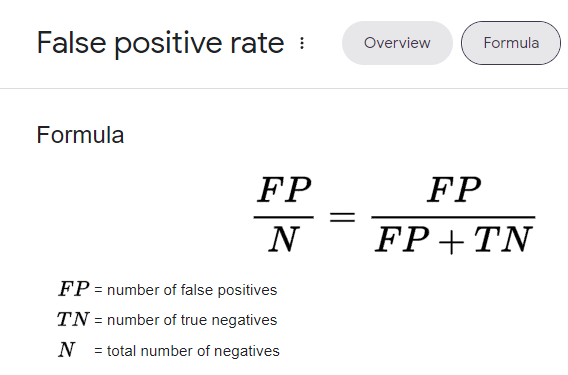
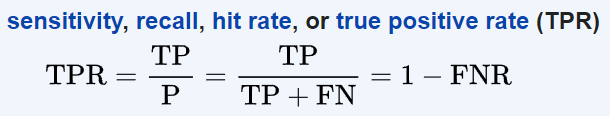

In [63]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [64]:
thresholds

array([           inf, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

In [65]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

In [66]:
import seaborn as sns


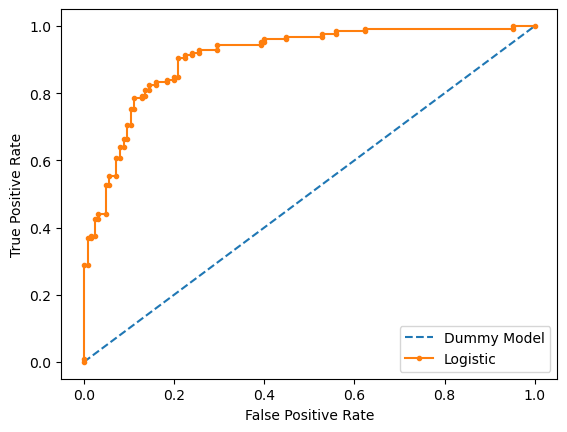

In [67]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


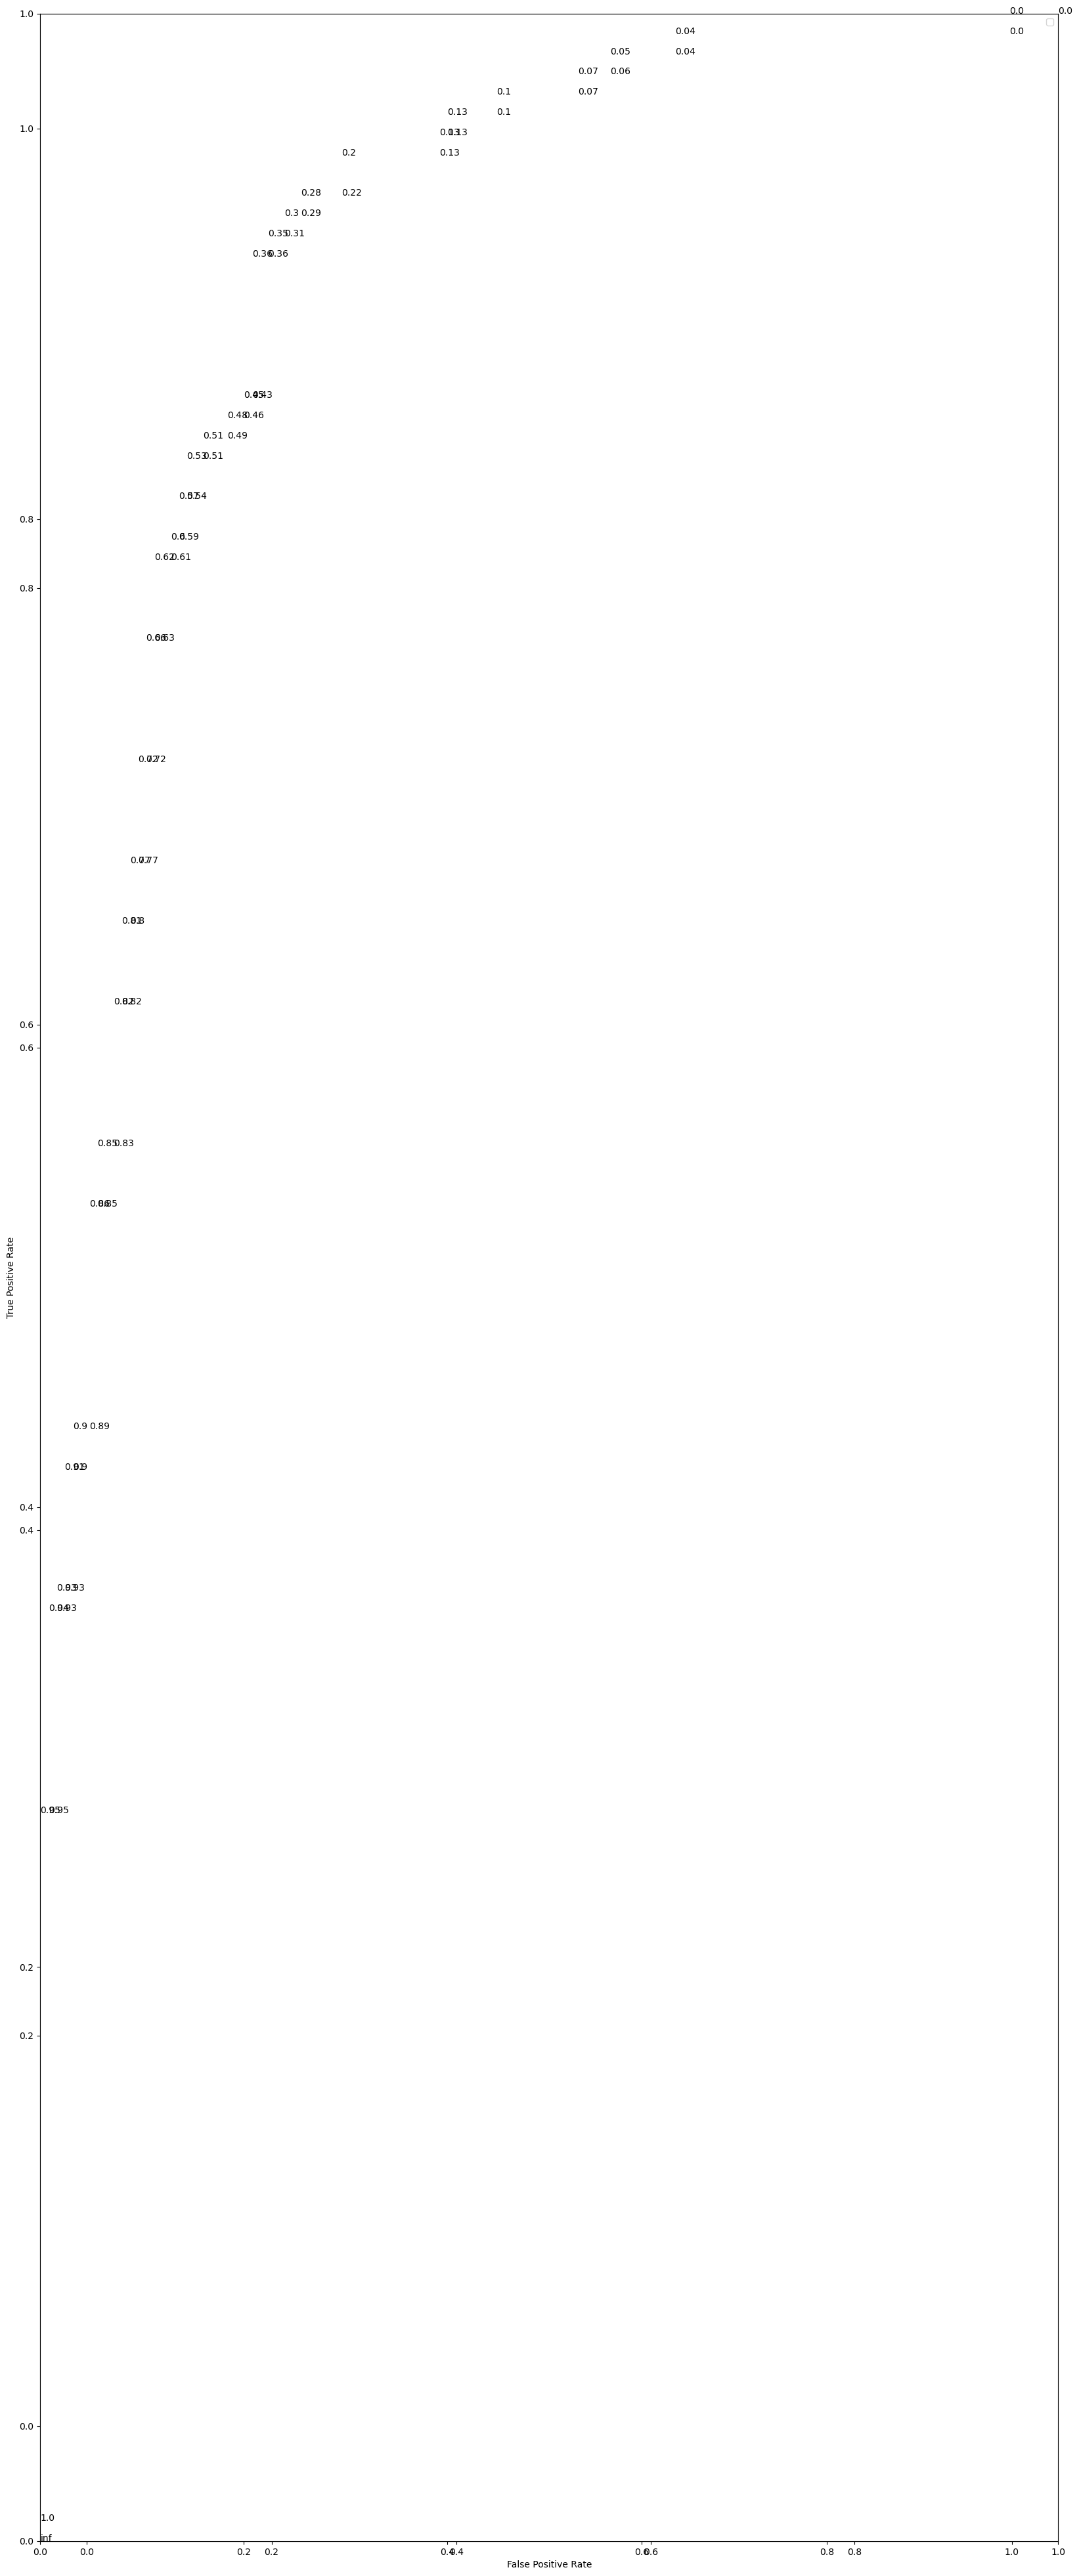

In [68]:
# plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()